정규분포에서 기댓값 모수와 분산 모수를 입력 변수로 가지는 가능도함수를 그리면 각각 다음과 같다. 기댓값 모수를 입력 변수로 가지는 가능도함수의 모양이 확률밀도함수와 같은 모양인 것은 ($x$와 $\mu$를 바꾸어도 식이 같아지는) 정규분포의 확률밀도함수가 가지는 특별한 성질 때문이며 아주 우연히 이렇게 된 것 뿐이다.

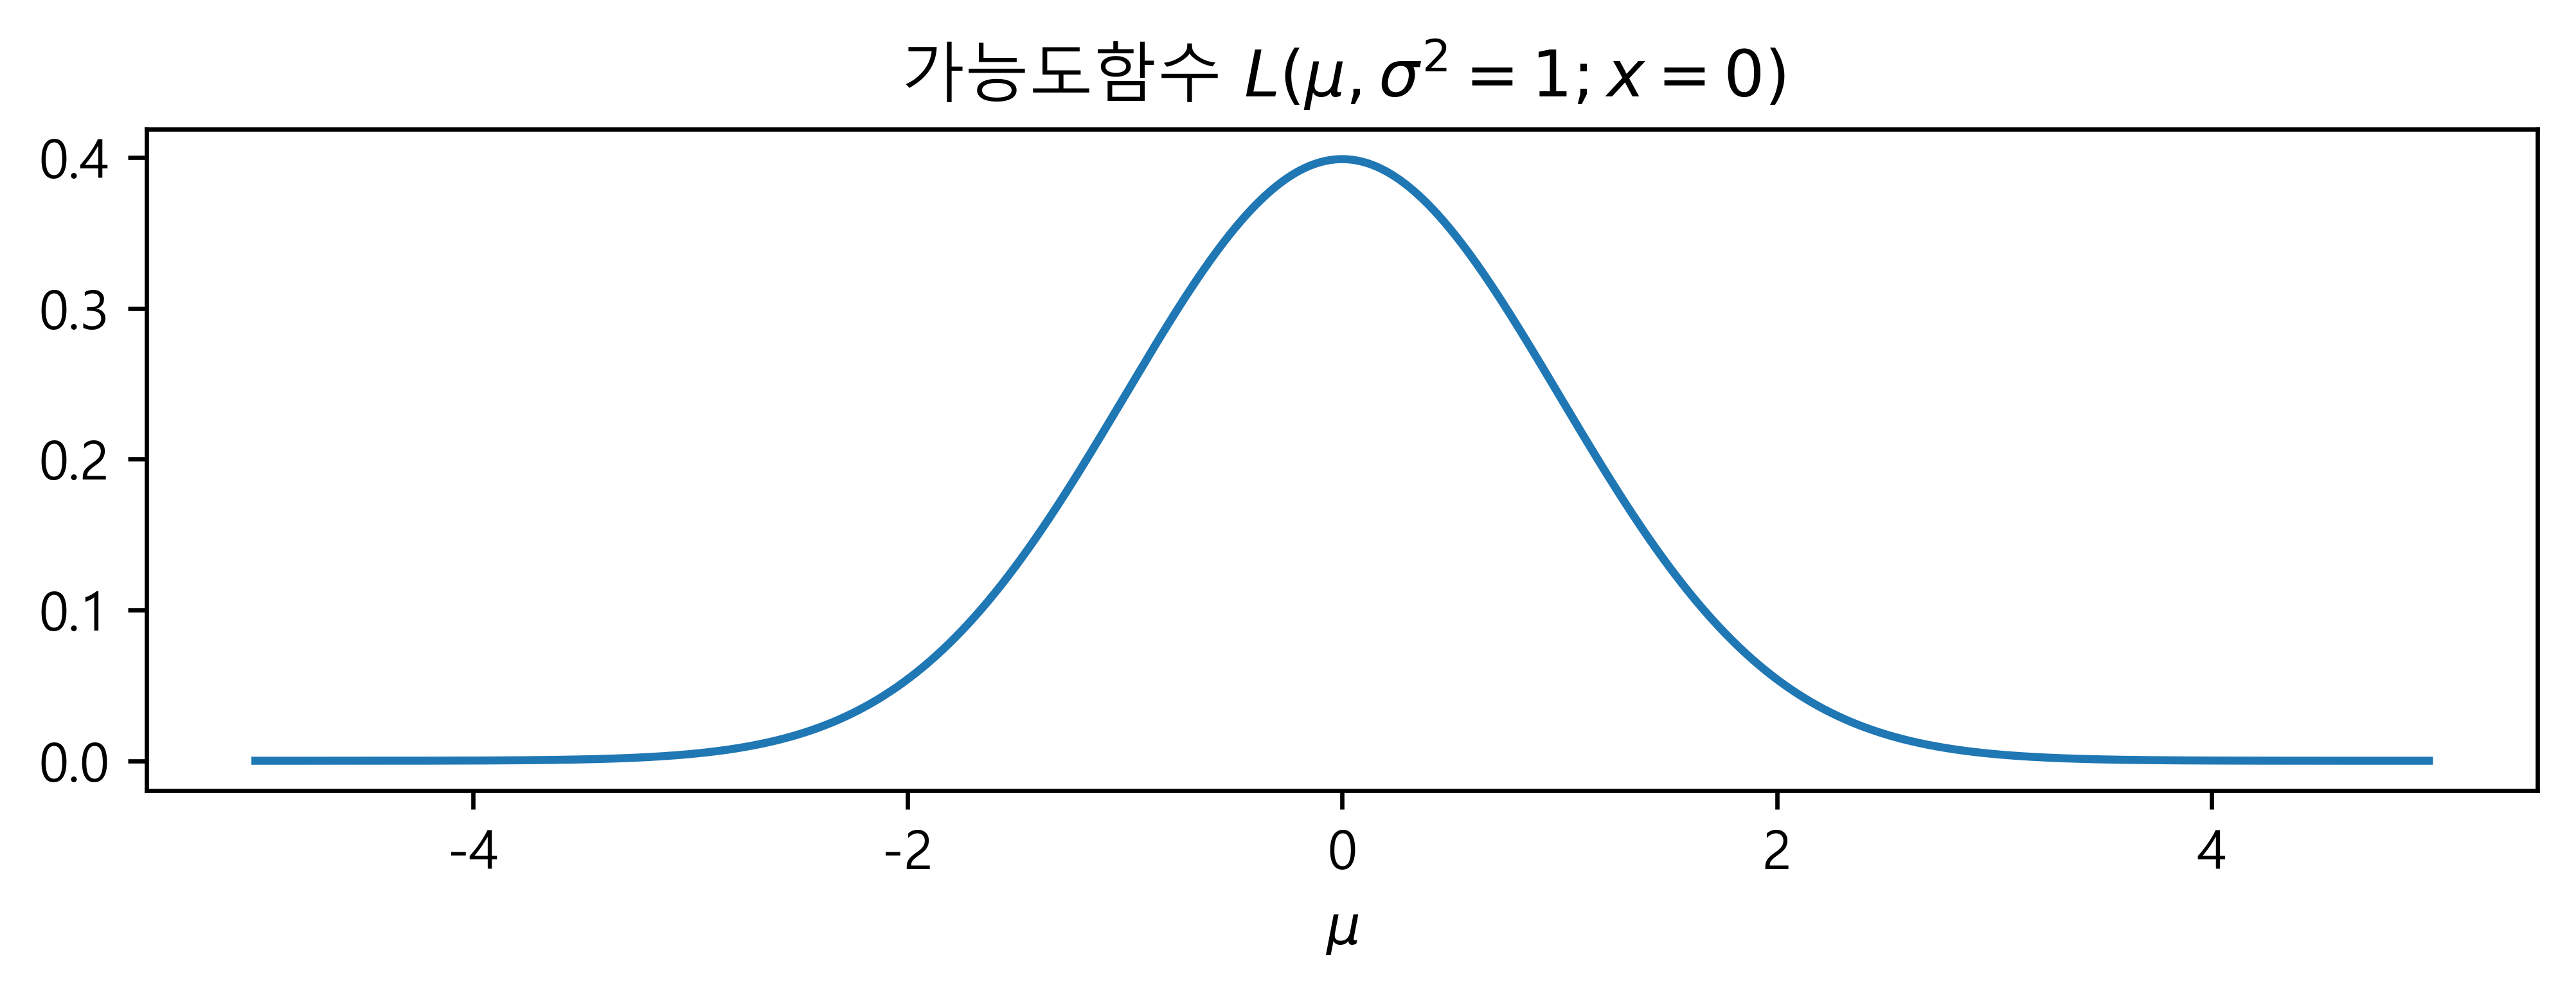

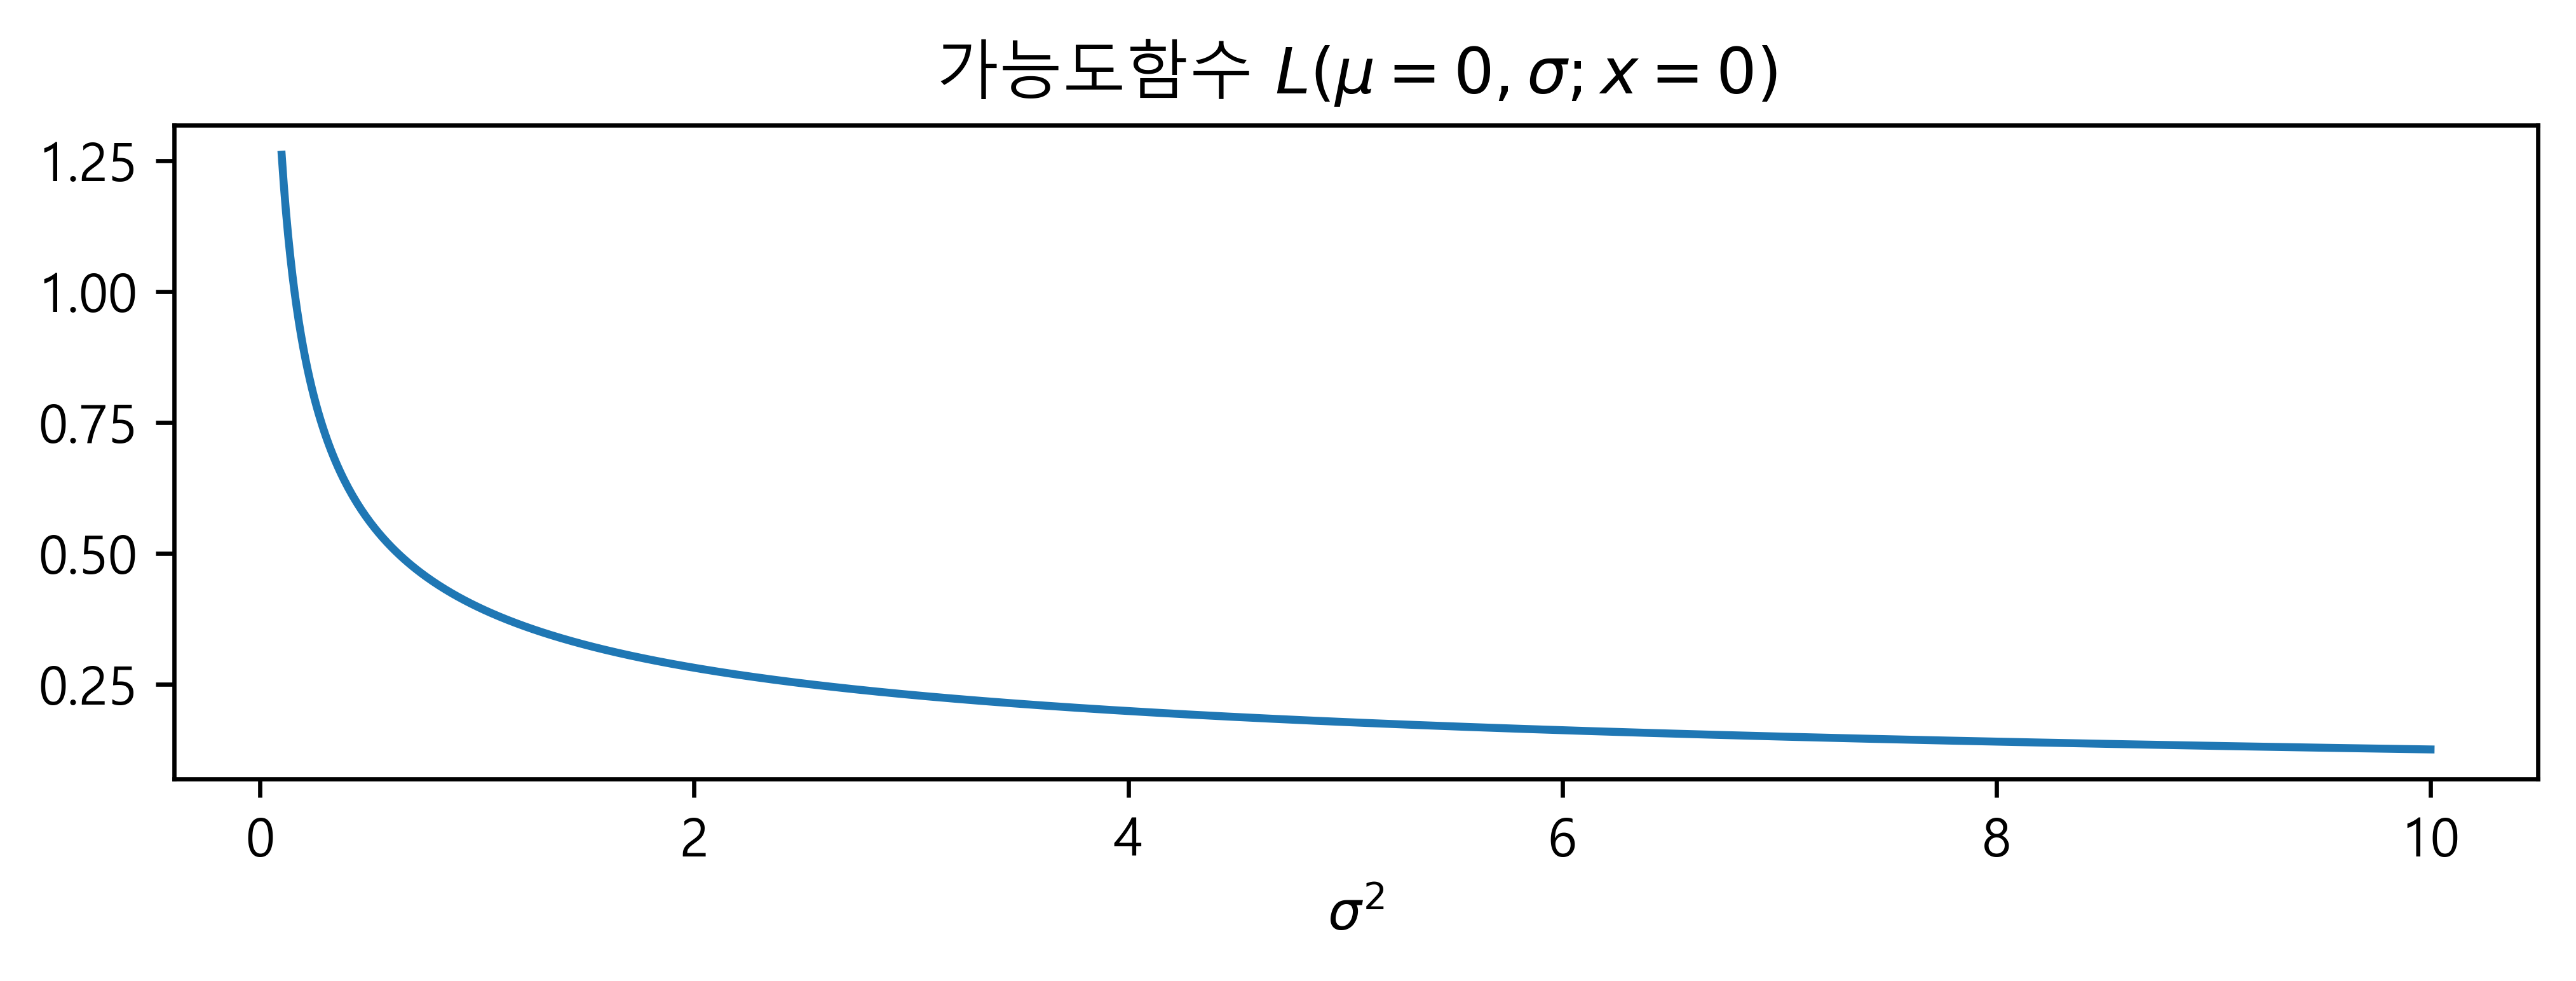

In [1]:
def likelihood_mu(mu):
    return sp.stats.norm(loc=mu).pdf(0)

mus = np.linspace(-5, 5, 1000)
likelihood_mu = [likelihood_mu(m) for m in mus]

plt.subplot(211)

plt.plot(mus, likelihood_mu)
plt.title("가능도함수 $L(\mu, \sigma^2=1; x=0)$")
plt.xlabel("$\mu$")
plt.show()

def likelihood_sigma2(sigma2):
    return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1, 10, 1000)
likelihood_sigma2 = [likelihood_sigma2(s) for s in sigma2s]

plt.subplot(212)
plt.plot(sigma2s, likelihood_sigma2)
plt.title("가능도함수 $L(\mu=0, \sigma; x=0)$")
plt.xlabel("$\sigma^2$")
plt.show()

 $L(\mu, \sigma^2)$은 이차원 함수이므로 입체로 그리면 다음과 같다.

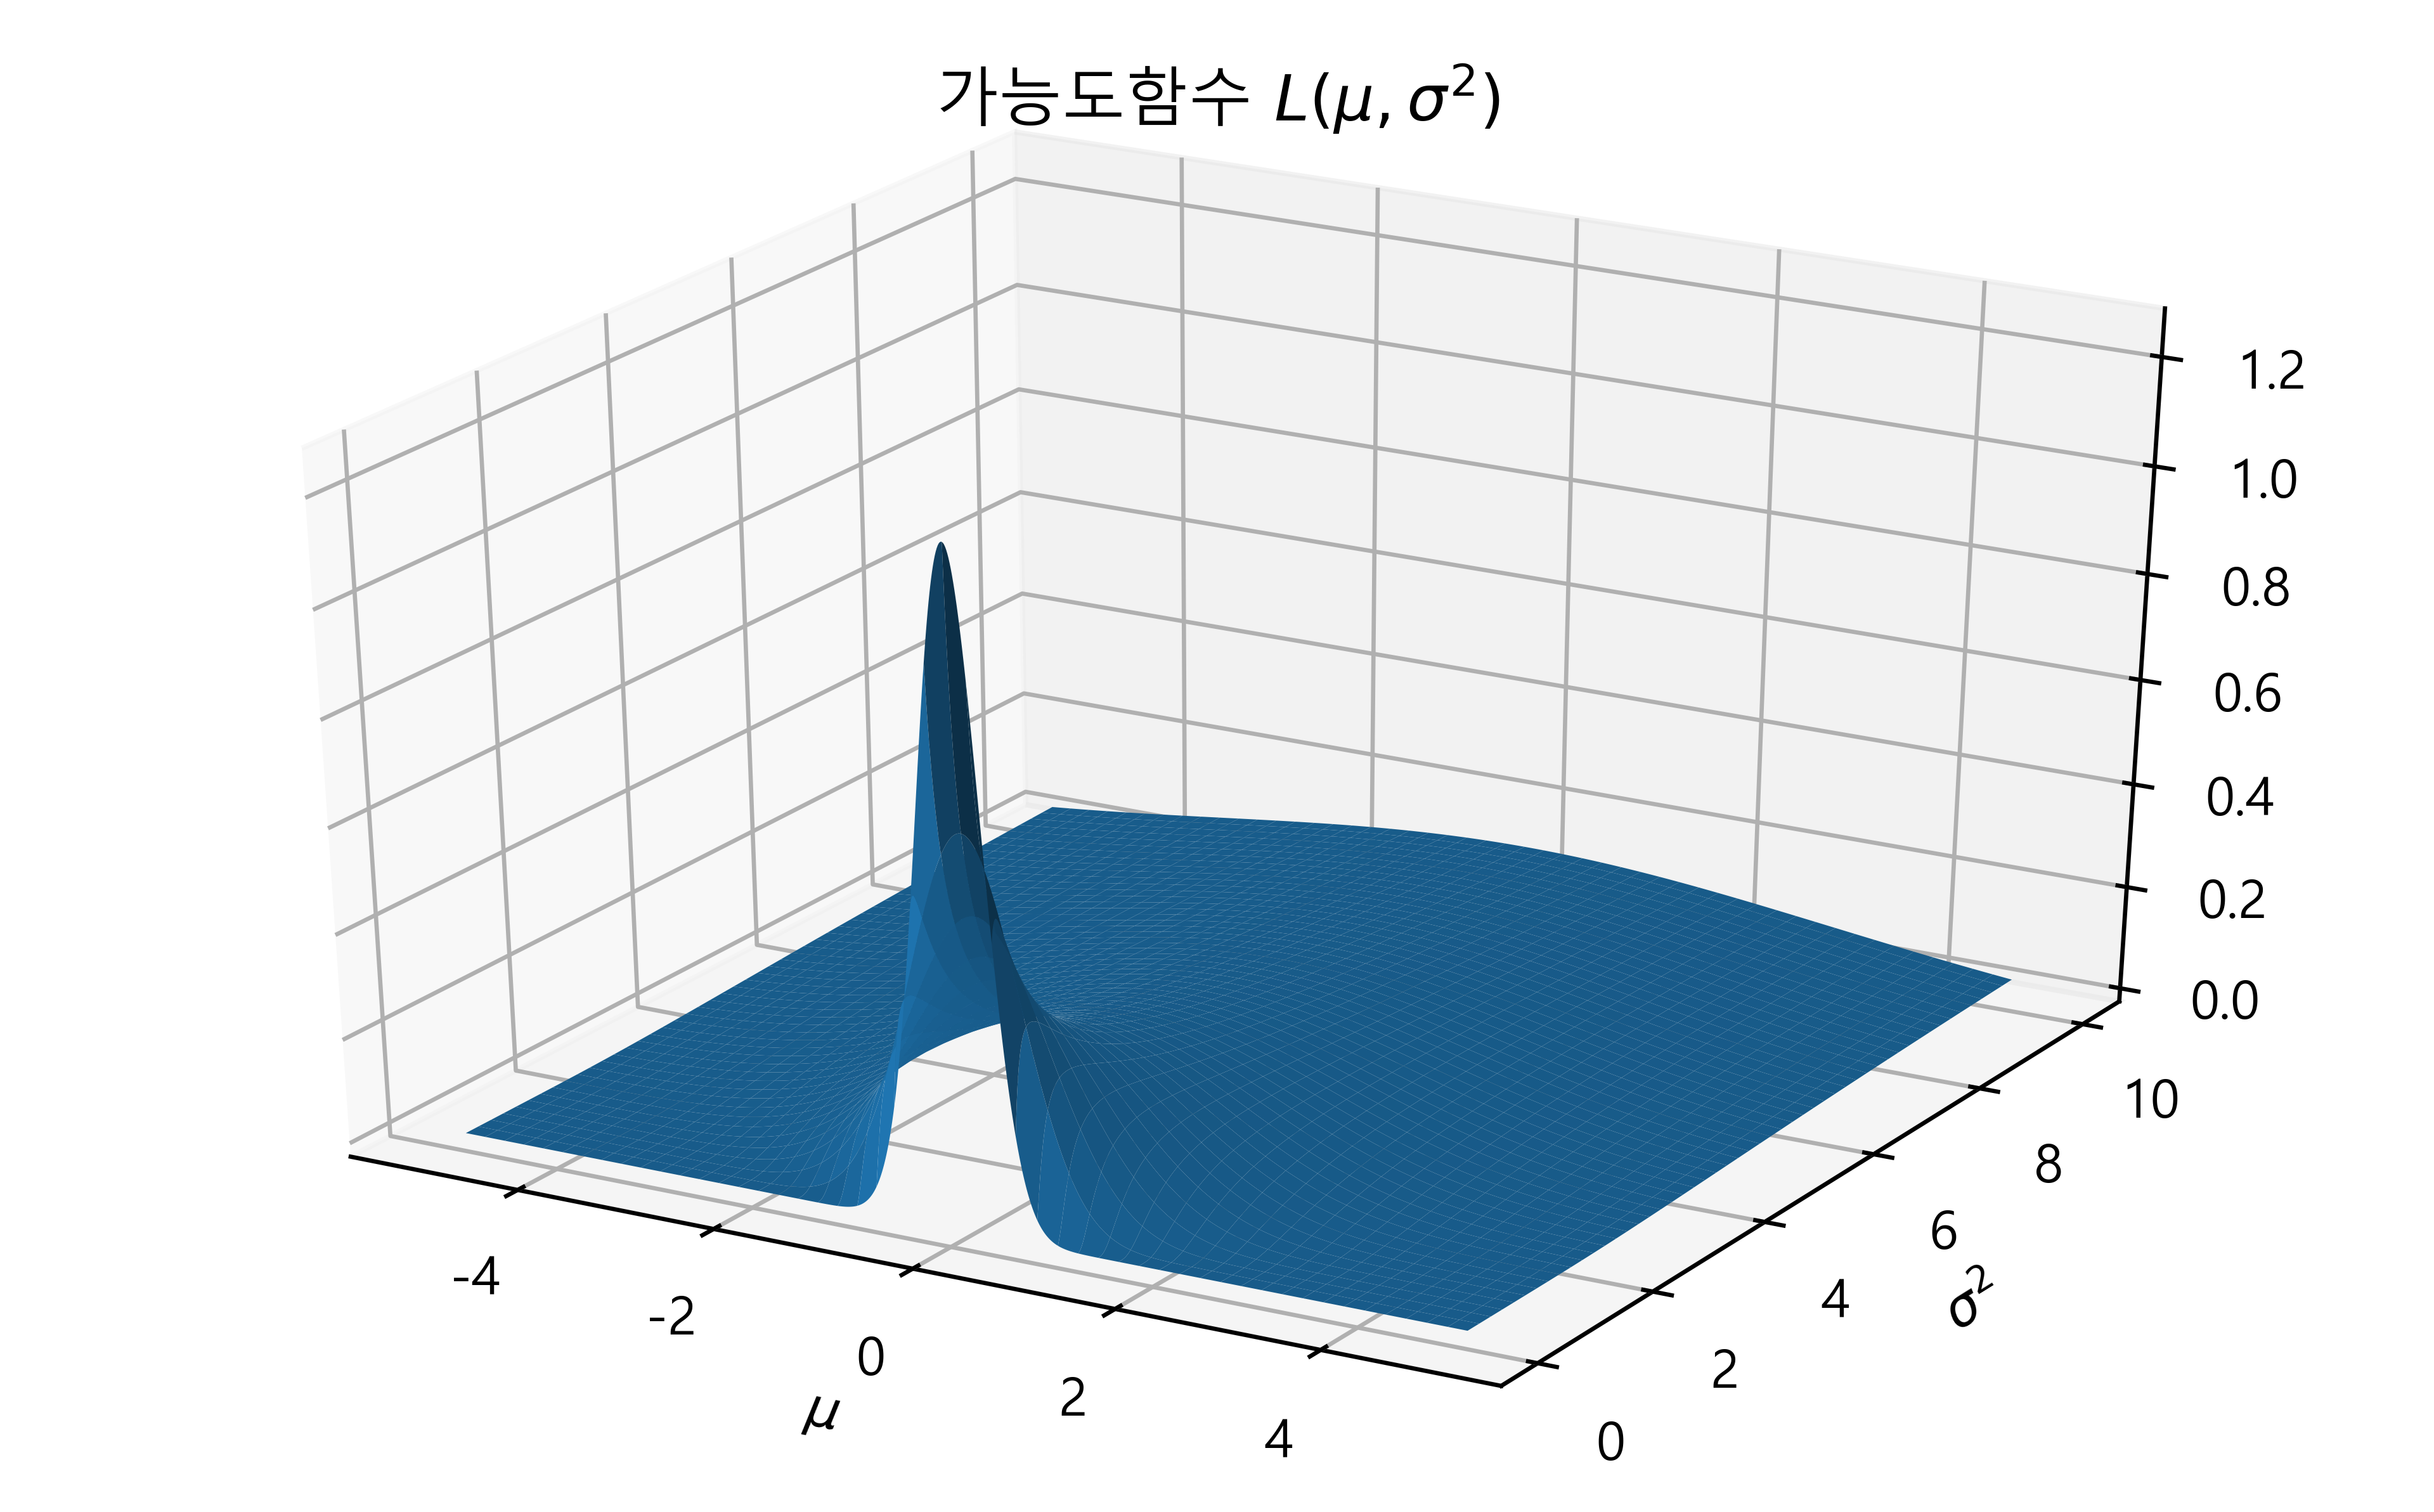

In [3]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L = np.exp(-MU ** 2 / (2 * SIGMA2)) / np.sqrt(2 * np.pi * SIGMA2)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(MU, SIGMA2, L, linewidth=0.1)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.title('가능도함수 $L(\mu, \sigma^2)$')
plt.show()

### 최대가능도 추정법

정규분포를 가지는 학률변수의 분산 $\sigma^2$ = 1은 알고 있으나 $\mu$를 모르고 있어 이를 추정해야 하는 문제를 생각해보자. 확률변수의 표본은 하나 $x_1 = 1$를 가지고 있다고 하자. 이 경우 $\mu$ 값이 가장 가능성(가능도)이 커 보이는가? 다음 그림에는 $\mu -1, \mu = 0, \mu = 1$, 세가지 후보를 제시한다. 이 세 가지 $\mu$ 값에 대해 1이 나올 확률밀도의 값이 바로 가능도다.

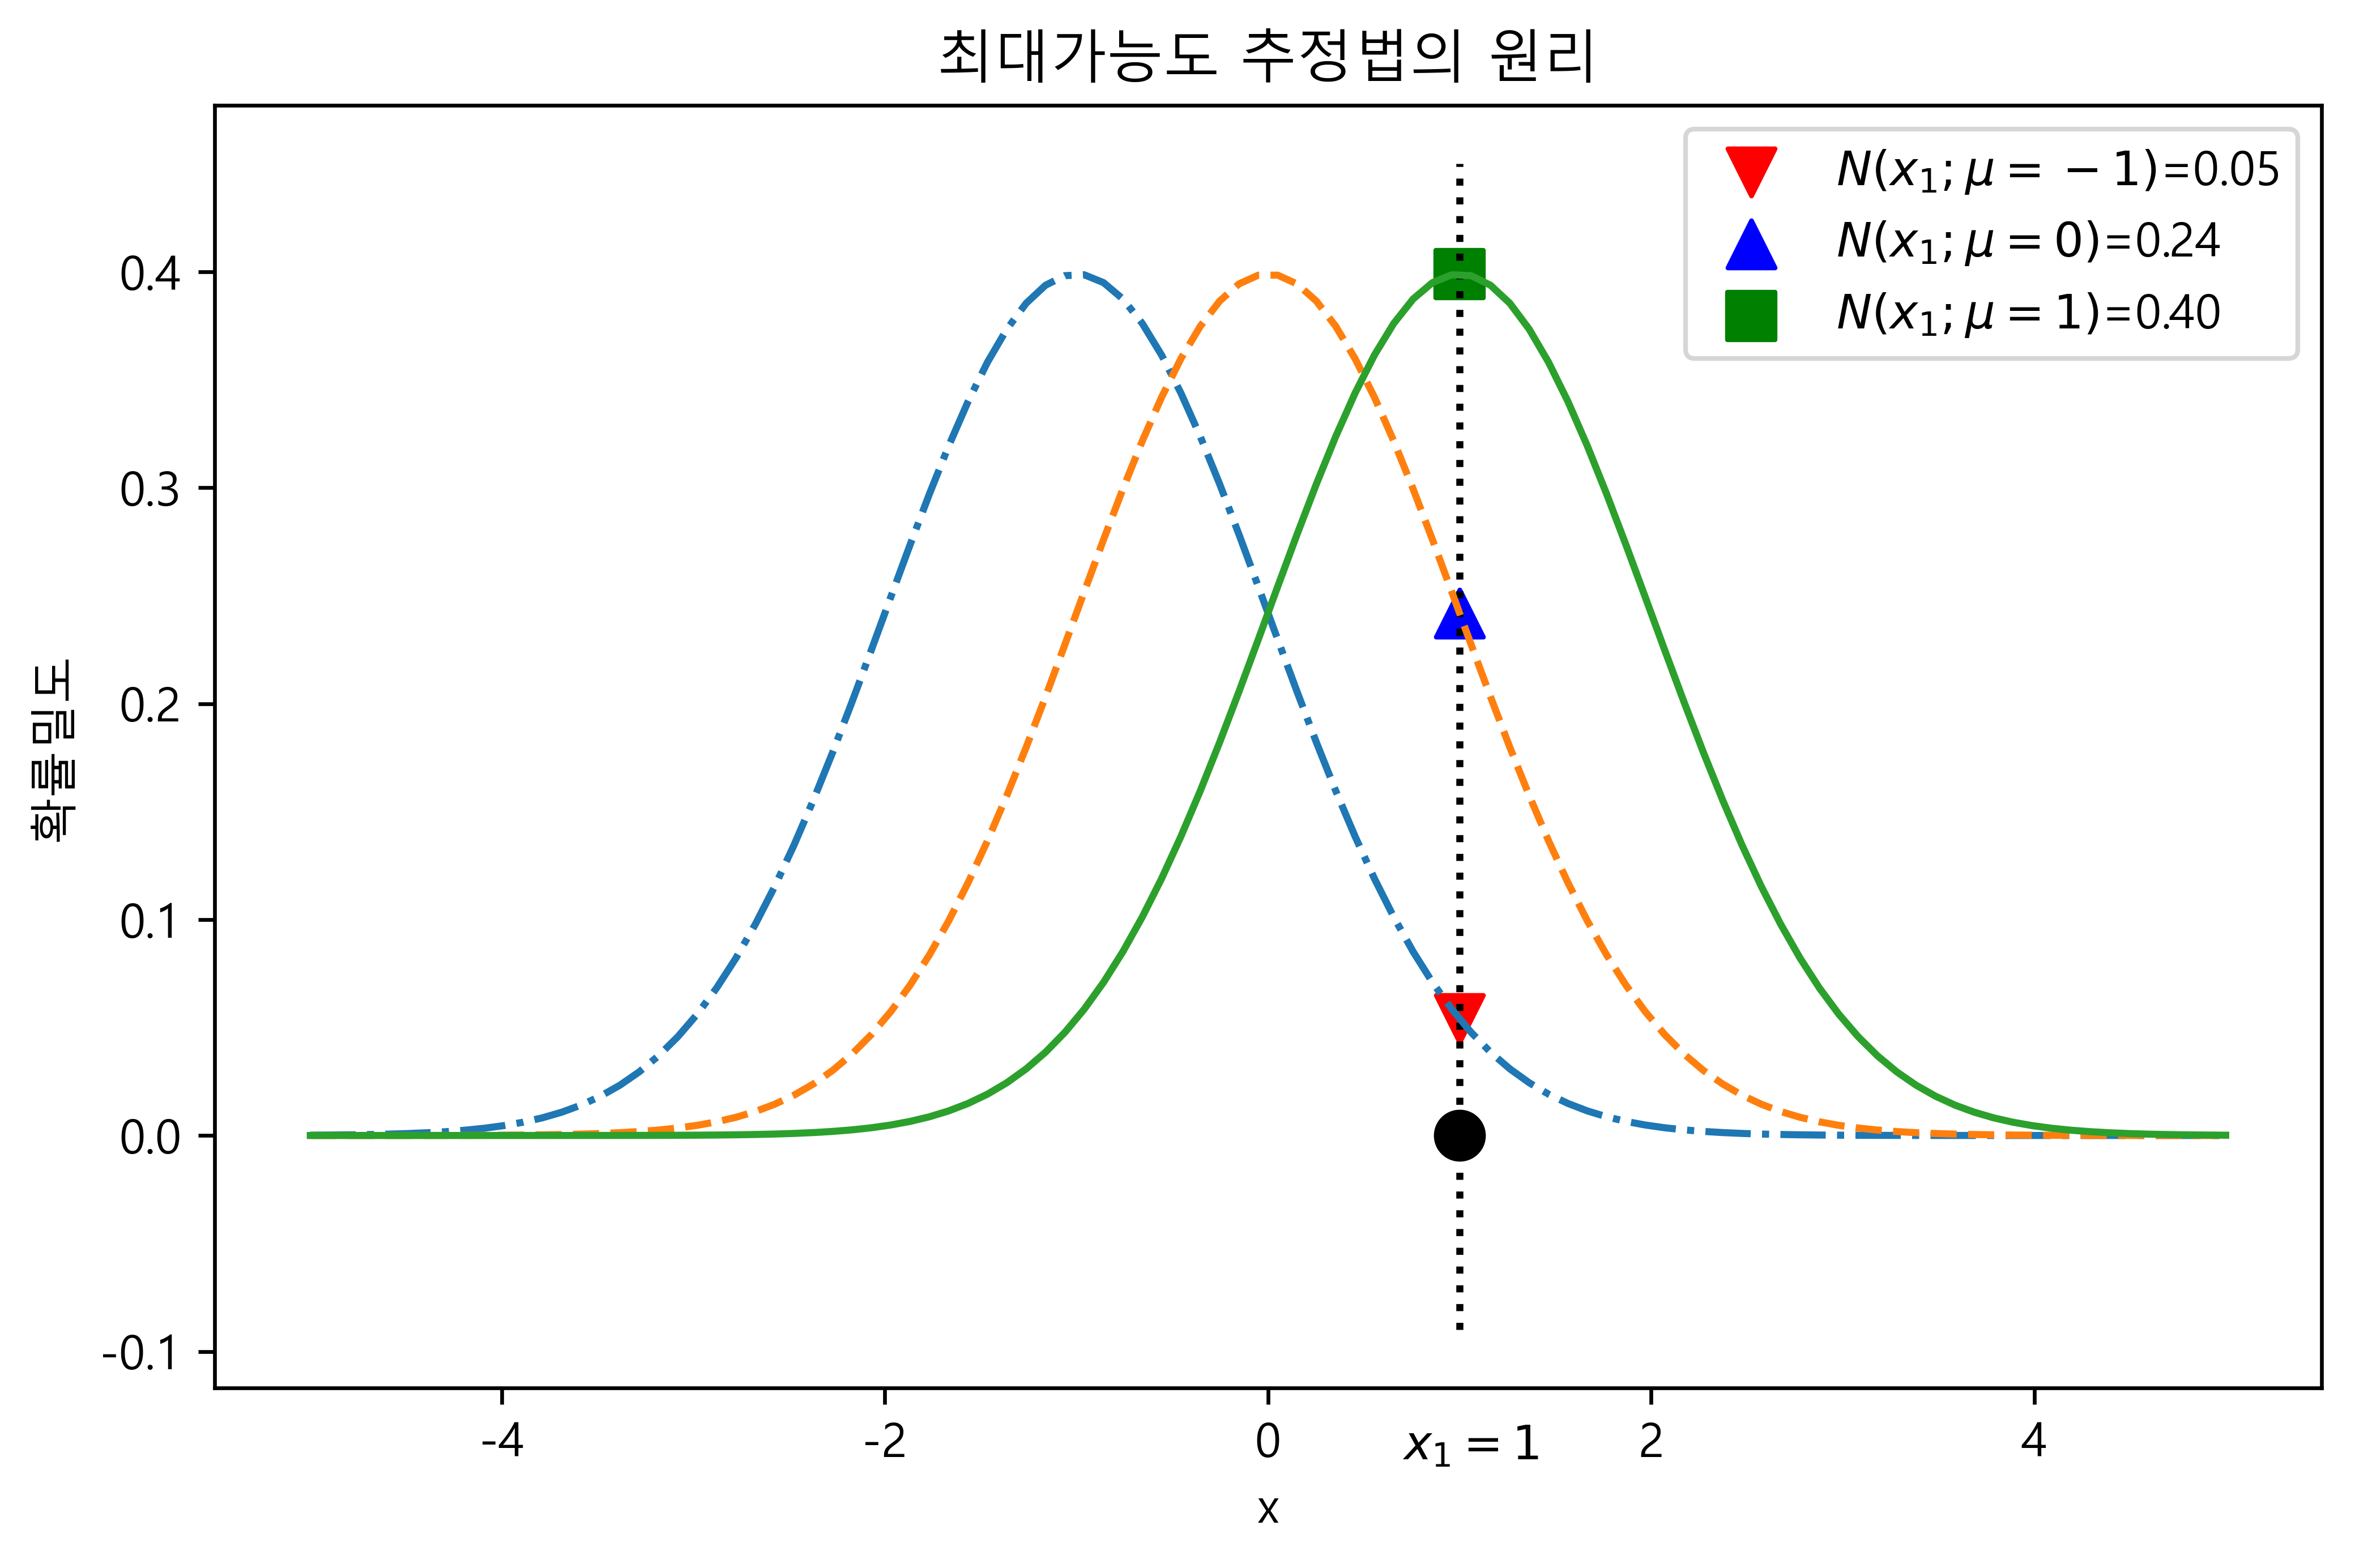

In [4]:
x = np.linspace(-5, 5, 100)

p1 = sp.stats.norm(loc=-1).pdf(1)
p2 = sp.stats.norm(loc=0).pdf(1)
p3 = sp.stats.norm(loc=1).pdf(1)

plt.scatter(1, p1, s=100, c='r', marker='v', 
            label=r"$N(x_1;\mu=-1)$={:.2f}".format(np.round(p1, 2)))
plt.scatter(1, p2, s=100, c='b', marker='^', 
            label=r"$N(x_1;\mu=0)$={:.2f}".format(np.round(p2, 2)))
plt.scatter(1, p3, s=100, c='g', marker='s', 
            label=r"$N(x_1;\mu=1)$={:.2f}".format(np.round(p3, 2)))

plt.plot(x, sp.stats.norm(loc=-1).pdf(x), ls="-.")
plt.plot(x, sp.stats.norm(loc=0).pdf(x), ls="--")
plt.plot(x, sp.stats.norm(loc=1).pdf(x), ls="-")
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(1-0.3, -0.15, "$x_1=1$")
plt.xlabel("x")
plt.ylabel("확률밀도")
plt.legend()
plt.title("최대가능도 추정법의 원리")
plt.show()

#### $N(x;\mu=-1)$이라는 확률분포에서 $x$=1이 나올 가능도(확률밀도)는 0.05이다.
#### $N(x;\mu=0)$이라는 확률분포에서 $x$=1이 나올 가능도(확률밀도)는 0.24이다.
#### $N(x;\mu=1)$이라는 확률분포에서 $x$=1이 나올 가능도(확률밀도)는 0.40이다.